In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/confused-eeg/EEG_data.csv
/kaggle/input/confused-eeg/demographic_info.csv
/kaggle/input/confused-eeg/videos/7.m4v
/kaggle/input/confused-eeg/videos/1.m4v
/kaggle/input/confused-eeg/videos/6.m4v
/kaggle/input/confused-eeg/videos/8.m4v
/kaggle/input/confused-eeg/videos/3.m4v
/kaggle/input/confused-eeg/videos/5.m4v
/kaggle/input/confused-eeg/videos/0.m4v
/kaggle/input/confused-eeg/videos/4.m4v
/kaggle/input/confused-eeg/videos/2.m4v
/kaggle/input/confused-eeg/videos/9.m4v


# **DATA ANALYSIS**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df=pd.read_csv("/kaggle/input/confused-eeg/EEG_data.csv")
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [5]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [6]:
df.tail(10)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
12801,9.0,9.0,53.0,61.0,474.0,667793.0,14829.0,2344.0,9768.0,2393.0,7217.0,8036.0,951.0,1.0,0.0
12802,9.0,9.0,64.0,61.0,397.0,384069.0,44069.0,15317.0,17620.0,4313.0,53160.0,18216.0,1006.0,1.0,0.0
12803,9.0,9.0,51.0,63.0,-58.0,2045793.0,178968.0,151240.0,17596.0,22894.0,45205.0,17791.0,2711.0,1.0,0.0
12804,9.0,9.0,51.0,63.0,-45.0,46525.0,7099.0,1830.0,1882.0,279.0,1051.0,1674.0,89.0,1.0,0.0
12805,9.0,9.0,54.0,41.0,305.0,313623.0,53046.0,1403.0,5641.0,2010.0,13052.0,3209.0,519.0,1.0,0.0
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0
12810,9.0,9.0,64.0,29.0,-49.0,1164555.0,1184366.0,50014.0,124208.0,10634.0,445383.0,22133.0,4482.0,1.0,0.0


In [7]:
df.describe

<bound method NDFrame.describe of        SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   680989.0   154296.0   
12809        9.0      9.0       60.0       29.0  -84.0   366269.0    27346.0   
12810        9.0      9.0       64.0       29.0  -49.0  1164555.0  1184366.0   

     

In [8]:
df.isnull().sum()

SubjectID             0
VideoID               0
Attention             0
Mediation             0
Raw                   0
Delta                 0
Theta                 0
Alpha1                0
Alpha2                0
Beta1                 0
Beta2                 0
Gamma1                0
Gamma2                0
predefinedlabel       0
user-definedlabeln    0
dtype: int64

In [9]:
df.transpose

<bound method DataFrame.transpose of        SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   680989.0   154296.0   
12809        9.0      9.0       60.0       29.0  -84.0   366269.0    27346.0   
12810        9.0      9.0       64.0       29.0  -49.0  1164555.0  1184366.0   

  

In [10]:
df.describe().transpose

<bound method DataFrame.transpose of           SubjectID       VideoID     Attention     Mediation           Raw  \
count  12811.000000  12811.000000  12811.000000  12811.000000  12811.000000   
mean       4.487394      4.390602     41.313871     47.182656     65.570760   
std        2.865373      2.913232     23.152953     22.655976    597.921035   
min        0.000000      0.000000      0.000000      0.000000  -2048.000000   
25%        2.000000      2.000000     27.000000     37.000000    -14.000000   
50%        4.000000      4.000000     43.000000     51.000000     35.000000   
75%        7.000000      7.000000     57.000000     63.000000     90.000000   
max        9.000000      9.000000    100.000000    100.000000   2047.000000   

              Delta         Theta        Alpha1        Alpha2         Beta1  \
count  1.281100e+04  1.281100e+04  1.281100e+04  1.281100e+04  1.281100e+04   
mean   6.057853e+05  1.680526e+05  4.138435e+04  3.318339e+04  2.431837e+04   
std    6.37623

In [11]:
df.shape

(12811, 15)

# **DATA ANALYSIS OF DEMOGRAPHIC DATA**

In [12]:
df1=pd.read_csv("/kaggle/input/confused-eeg/demographic_info.csv")
df1.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [13]:
df1=df1.rename(columns = {'subject ID': 'SubjectID'})
df1.head()

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


# MERGING BOTH THE DATA SETS 

In [14]:
df = df.merge(df1,how = 'inner',on = 'SubjectID')
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


# DATA ANALYSIS OF MERGED DATA 

In [15]:
df.info

<bound method DataFrame.info of        SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   680989.0   154296.0   
12809        9.0      9.0       60.0       29.0  -84.0   366269.0    27346.0   
12810        9.0      9.0       64.0       29.0  -49.0  1164555.0  1184366.0   

       

In [16]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', ' age', ' ethnicity',
       ' gender'],
      dtype='object')

In [17]:
df.describe

<bound method NDFrame.describe of        SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   680989.0   154296.0   
12809        9.0      9.0       60.0       29.0  -84.0   366269.0    27346.0   
12810        9.0      9.0       64.0       29.0  -49.0  1164555.0  1184366.0   

     

In [18]:
df.shape

(12811, 18)

In [19]:
df.tail(10)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
12801,9.0,9.0,53.0,61.0,474.0,667793.0,14829.0,2344.0,9768.0,2393.0,7217.0,8036.0,951.0,1.0,0.0,24,Han Chinese,F
12802,9.0,9.0,64.0,61.0,397.0,384069.0,44069.0,15317.0,17620.0,4313.0,53160.0,18216.0,1006.0,1.0,0.0,24,Han Chinese,F
12803,9.0,9.0,51.0,63.0,-58.0,2045793.0,178968.0,151240.0,17596.0,22894.0,45205.0,17791.0,2711.0,1.0,0.0,24,Han Chinese,F
12804,9.0,9.0,51.0,63.0,-45.0,46525.0,7099.0,1830.0,1882.0,279.0,1051.0,1674.0,89.0,1.0,0.0,24,Han Chinese,F
12805,9.0,9.0,54.0,41.0,305.0,313623.0,53046.0,1403.0,5641.0,2010.0,13052.0,3209.0,519.0,1.0,0.0,24,Han Chinese,F
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0,24,Han Chinese,F
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0,24,Han Chinese,F
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0,24,Han Chinese,F
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0,24,Han Chinese,F
12810,9.0,9.0,64.0,29.0,-49.0,1164555.0,1184366.0,50014.0,124208.0,10634.0,445383.0,22133.0,4482.0,1.0,0.0,24,Han Chinese,F


In [20]:
df.transpose

<bound method DataFrame.transpose of        SubjectID  VideoID  Attention  Mediation    Raw      Delta      Theta  \
0            0.0      0.0       56.0       43.0  278.0   301963.0    90612.0   
1            0.0      0.0       40.0       35.0  -50.0    73787.0    28083.0   
2            0.0      0.0       47.0       48.0  101.0   758353.0   383745.0   
3            0.0      0.0       47.0       57.0   -5.0  2012240.0   129350.0   
4            0.0      0.0       44.0       53.0   -8.0  1005145.0   354328.0   
...          ...      ...        ...        ...    ...        ...        ...   
12806        9.0      9.0       64.0       38.0  -39.0   127574.0     9951.0   
12807        9.0      9.0       61.0       35.0 -275.0   323061.0   797464.0   
12808        9.0      9.0       60.0       29.0 -426.0   680989.0   154296.0   
12809        9.0      9.0       60.0       29.0  -84.0   366269.0    27346.0   
12810        9.0      9.0       64.0       29.0  -49.0  1164555.0  1184366.0   

  

In [21]:
df.isnull().sum()

SubjectID             0
VideoID               0
Attention             0
Mediation             0
Raw                   0
Delta                 0
Theta                 0
Alpha1                0
Alpha2                0
Beta1                 0
Beta2                 0
Gamma1                0
Gamma2                0
predefinedlabel       0
user-definedlabeln    0
 age                  0
 ethnicity            0
 gender               0
dtype: int64

In [22]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,12801,12802,12803,12804,12805,12806,12807,12808,12809,12810
SubjectID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
VideoID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Attention,56.0,40.0,47.0,47.0,44.0,44.0,43.0,40.0,43.0,47.0,...,53.0,64.0,51.0,51.0,54.0,64.0,61.0,60.0,60.0,64.0
Mediation,43.0,35.0,48.0,57.0,53.0,66.0,69.0,61.0,69.0,69.0,...,61.0,61.0,63.0,63.0,41.0,38.0,35.0,29.0,29.0,29.0
Raw,278.0,-50.0,101.0,-5.0,-8.0,73.0,130.0,-2.0,17.0,-59.0,...,474.0,397.0,-58.0,-45.0,305.0,-39.0,-275.0,-426.0,-84.0,-49.0
Delta,301963.0,73787.0,758353.0,2012240.0,1005145.0,1786446.0,635191.0,161098.0,492796.0,82048.0,...,667793.0,384069.0,2045793.0,46525.0,313623.0,127574.0,323061.0,680989.0,366269.0,1164555.0
Theta,90612.0,28083.0,383745.0,129350.0,354328.0,176766.0,122446.0,12119.0,120998.0,116131.0,...,14829.0,44069.0,178968.0,7099.0,53046.0,9951.0,797464.0,154296.0,27346.0,1184366.0
Alpha1,33735.0,1439.0,201999.0,61236.0,37102.0,59352.0,90107.0,1963.0,63697.0,47317.0,...,2344.0,15317.0,151240.0,1830.0,1403.0,709.0,153171.0,40068.0,11444.0,50014.0
Alpha2,23991.0,2240.0,62107.0,17084.0,88881.0,26157.0,65072.0,809.0,68242.0,26197.0,...,9768.0,17620.0,17596.0,1882.0,5641.0,21732.0,145805.0,39122.0,9932.0,124208.0
Beta1,27946.0,2746.0,36293.0,11488.0,45307.0,15054.0,36230.0,1277.0,10769.0,41642.0,...,2393.0,4313.0,22894.0,279.0,2010.0,3872.0,39829.0,10966.0,1939.0,10634.0


# Encoding the Ethnicity and Gender Column into integer 

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
 df[col] = label_encoder.fit_transform(df[col])

In [25]:
df.head(10)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,2,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,2,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,2,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,2,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,2,1
5,0.0,0.0,44.0,66.0,73.0,1786446.0,176766.0,59352.0,26157.0,15054.0,33669.0,33782.0,31750.0,0.0,0.0,25,2,1
6,0.0,0.0,43.0,69.0,130.0,635191.0,122446.0,90107.0,65072.0,36230.0,53019.0,62938.0,59307.0,0.0,0.0,25,2,1
7,0.0,0.0,40.0,61.0,-2.0,161098.0,12119.0,1963.0,809.0,1277.0,3186.0,3266.0,2518.0,0.0,0.0,25,2,1
8,0.0,0.0,43.0,69.0,17.0,492796.0,120998.0,63697.0,68242.0,10769.0,88403.0,73756.0,22676.0,0.0,0.0,25,2,1
9,0.0,0.0,47.0,69.0,-59.0,82048.0,116131.0,47317.0,26197.0,41642.0,28866.0,32551.0,41810.0,0.0,0.0,25,2,1


# Corelation 

<Axes: >

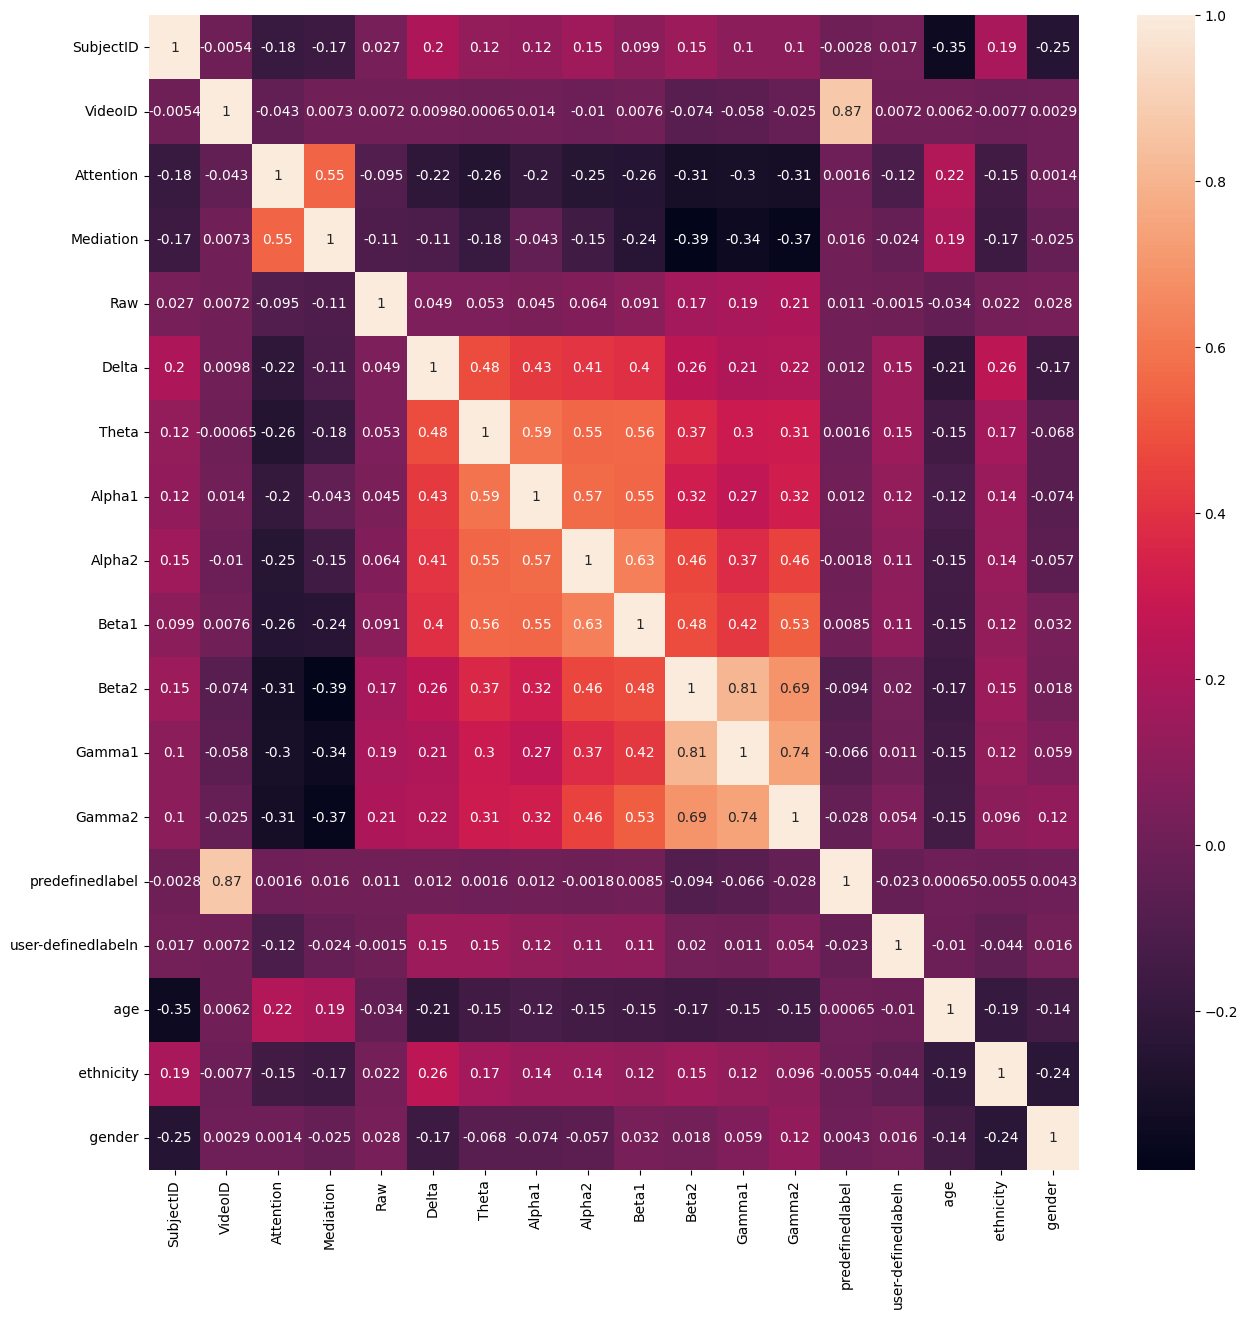

In [26]:
plt.figure(figsize = (15,15))
cor_matrix = df.corr()
sns.heatmap(cor_matrix,annot=True)

# Necessary Features for Model Training of the Data 

In [27]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [28]:
import pandas as pd
df.drop(['SubjectID','VideoID','predefinedlabel'],axis=1)

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,age,ethnicity,gender
0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,25,2,1
1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,25,2,1
2,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,25,2,1
3,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,25,2,1
4,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,25,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0,24,2,0
12807,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0,24,2,0
12808,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0,24,2,0
12809,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0,24,2,0


In [29]:
y= df.pop('user-definedlabeln')
x= df

# Normalization

Before Normalization

<Axes: >

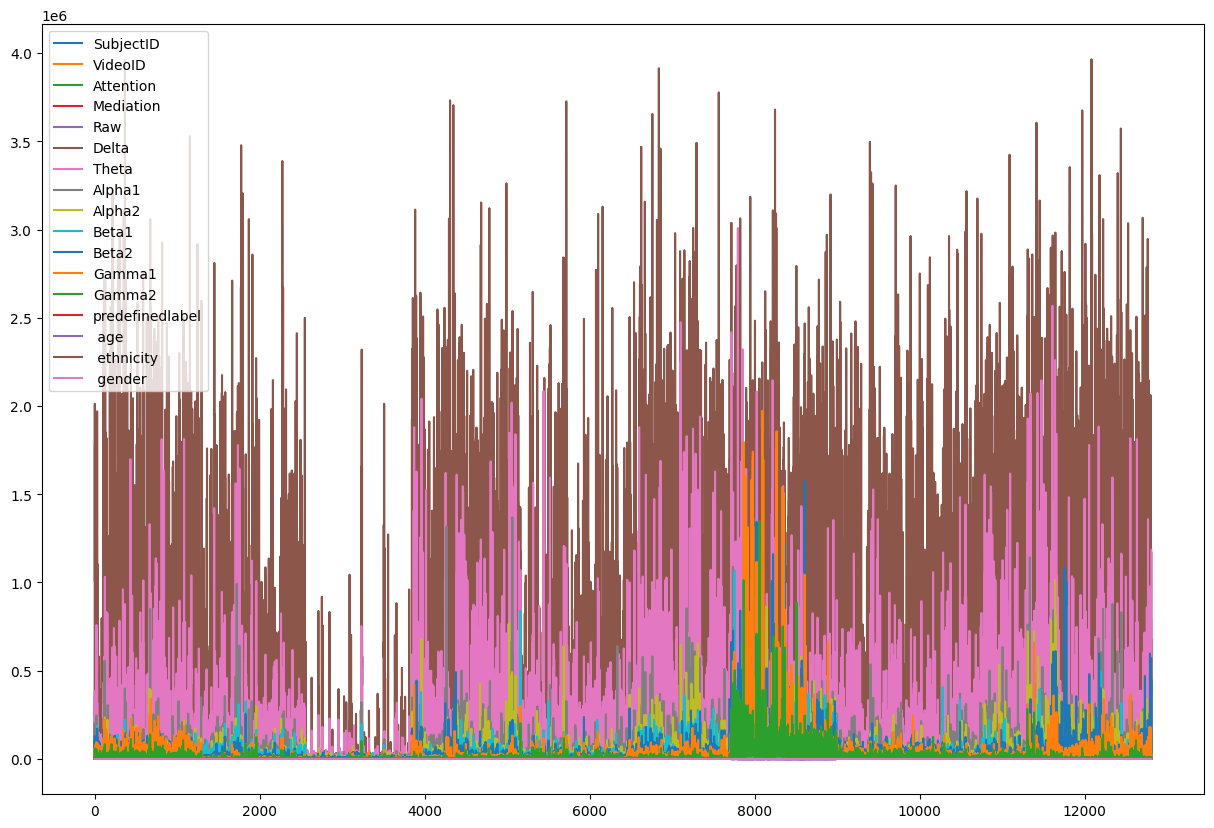

In [30]:
x.iloc[:1000,:11]
x.plot(figsize = (15,10))

#  Z-Score Normalization (due to wide features in the data set)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
x=df
x = StandardScaler().fit_transform(x)

After Normalization

<Axes: >

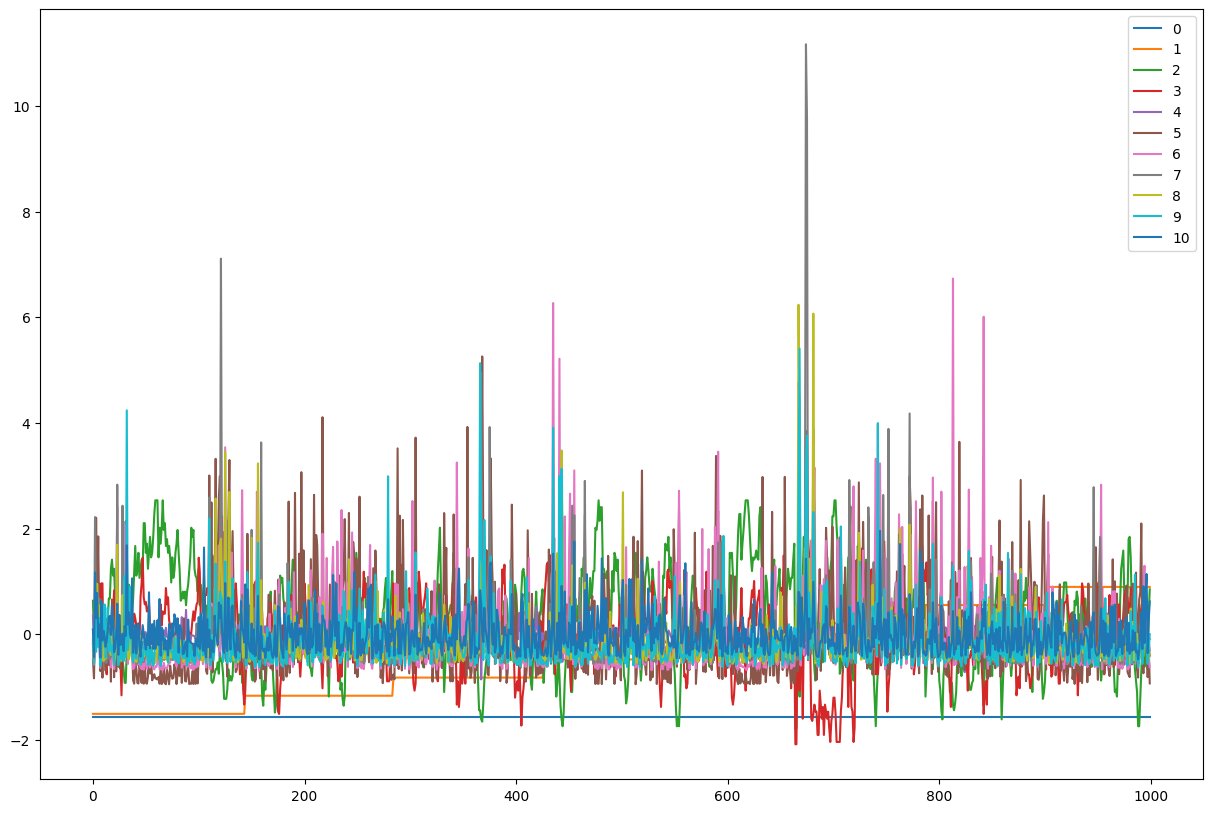

In [33]:
pd.DataFrame(x).iloc[:1000,:11].plot(figsize = (15,10))

Dividing the Data into train and test

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

In [35]:
xtrain.shape

(10889, 17)

In [36]:
xtest.shape

(1922, 17)

In [37]:
ytrain.shape

(10889,)

In [38]:
ytest.shape

(1922,)

# Model Fitting

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model=LogisticRegression(solver='liblinear')
model.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [41]:
predict_class=model.predict(xtest)
print('Actual Performance=',ytest,
      'Predicted class=',predict_class)

Actual Performance= 3243     1.0
777      1.0
3645     1.0
9531     1.0
9863     0.0
        ... 
10451    0.0
9283     0.0
9669     1.0
8881     0.0
5401     1.0
Name: user-definedlabeln, Length: 1922, dtype: float64 Predicted class= [0. 0. 1. ... 0. 1. 1.]


In [42]:
from sklearn import metrics

In [43]:
print(metrics.accuracy_score(ytest,predict_class))

0.605098855359001


In [44]:
ytest.value_counts()

user-definedlabeln
1.0    1020
0.0     902
Name: count, dtype: int64

In [45]:
print('True:',ytest.values[0:100])
print('Pred:',predict_class[0:100])

True: [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1.]
Pred: [0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1.]


In [46]:
print(metrics.confusion_matrix(ytest,predict_class))

[[571 331]
 [428 592]]


In [47]:
print('True:',ytest.values[0:25])
print('Pred:',predict_class[0:25])

True: [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0.]
Pred: [0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 0.]


In [48]:
confusion=metrics.confusion_matrix(ytest,predict_class)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [49]:
print('TP=',TP,'TN=',TN,'FP=',FP,'FN=',FN)

TP= 592 TN= 571 FP= 331 FN= 428


In [50]:
print((TP+TN)/(TP+TN+FP+FN))
print(metrics.accuracy_score(ytest,predict_class))

0.605098855359001
0.605098855359001


In [51]:
print((FP+FN)/(TP+TN+FP+FN))
print(1-metrics.accuracy_score(ytest,predict_class))

0.39490114464099896
0.394901144640999


In [52]:
print(TP/(TP+FN))
print(metrics.recall_score(ytest,predict_class))

0.5803921568627451
0.5803921568627451


In [53]:
print(TP/(FP+TN))

0.656319290465632


In [54]:
print(FP/(FP+TN))

0.3669623059866962


In [55]:
print(FP/(FP+TN))

0.3669623059866962


In [56]:
print(TP/(TP+FP))
print(metrics.recall_score(ytest,predict_class))

0.6413867822318526
0.5803921568627451


In [57]:
model.predict(xtest)[0:10]

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 0.])

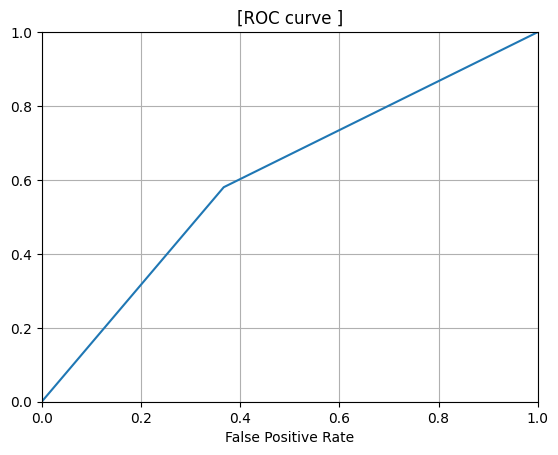

In [58]:
fpr,tpr,thresholds=metrics.roc_curve(ytest,predict_class)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('[ROC curve ]')
plt.xlabel('False Positive Rate')
plt.ylabel;('True Positive Rate')
plt.grid(True)